In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%config Completer.use_jedi = False

In [2]:
import random
import json

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import f1_score

### Create Classes to Store Text Data

In [11]:
class Sentiment:
    NEGATIVE = "NEGATIVE"
    NEUTRAL = "NEUTRAL"
    POSITIVE = "POSITIVE"

In [12]:
class Review:
    def __init__ (self, text, score):
        self.text = text
        self.score = score
        self.sentiment = self.get_sentiment()
        
    def get_sentiment(self):
        if self.score <= 2:
            return Sentiment.NEGATIVE
        elif self.score == 3:
            return Sentiment.NEUTRAL
        else:  # score of 4 or 5
            return Sentiment.POSITIVE

### Load the Data

In [32]:
file_name = './data/books_small.json'
    
reviews = []
with open (file_name) as f:
    for line in f:
#         print(line)
        review = json.loads(line)
#         print(review['reviewText'])
#         print(review['overall'])
        reviews.append(Review(review['reviewText'], review['overall']))

reviews[5].score
reviews[5].text

'Love the book, great story line, keeps you entertained.for a first novel from this author she did a great job,  Would definitely recommend!'

In [33]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
train, test = train_test_split(reviews, test_size=0.33, random_state=42)

In [35]:
train[0].sentiment

'POSITIVE'

In [36]:
X_train = [x.text for x in train]
y_train = [x.sentiment for x in train]

In [37]:
X_test = [x.text for x in test]
y_test = [x.sentiment for x in test]

#### Bag of Words Vectorization

In [38]:
vectorizer = CountVectorizer()
vectorizer.fit_transform(X_train)  # or use fit then transform

<670x7372 sparse matrix of type '<class 'numpy.int64'>'
	with 41455 stored elements in Compressed Sparse Row format>

In [39]:
X_train_vectors = vectorizer.fit_transform(X_train)
print(X_train_vectors[0].toarray())

[[0 0 0 ... 0 0 0]]


In [40]:
X_test_vectors = vectorizer.transform(X_test)

### Classification

Automatically created module for IPython interactive environment


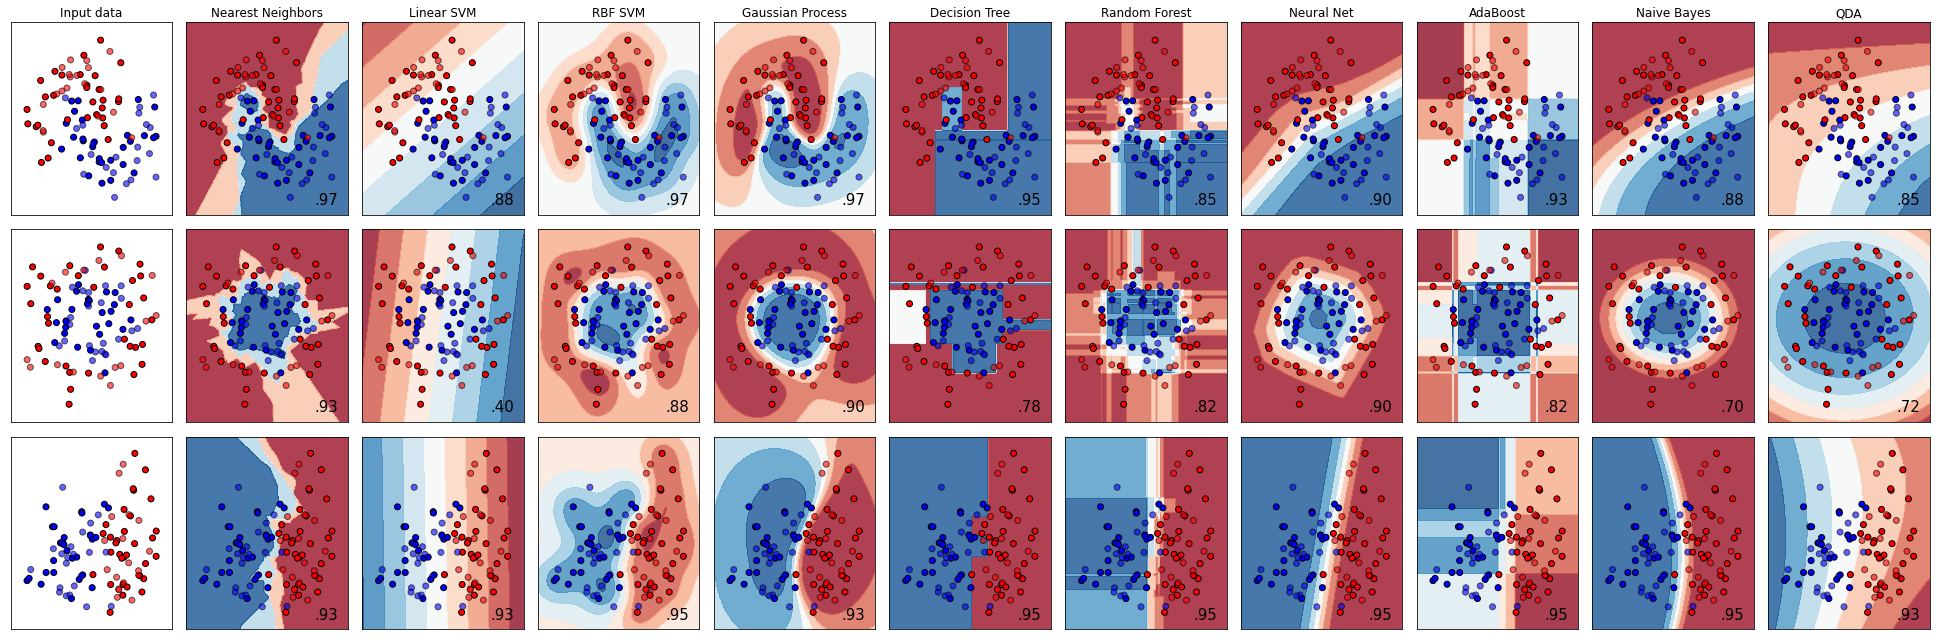

In [26]:
print(__doc__)


# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

#### Linear Support Vector Machine Classifier

In [41]:
from sklearn import svm

In [44]:
svm_classifier = svm.SVC(kernel='linear')

svm_classifier.fit(X_train_vectors, y_train)

svm_classifier.predict(X_test_vectors[0])

array(['POSITIVE'], dtype='<U8')

In [43]:
X_test[0]

"Every new Myke Cole book is better than the last, and this is no exception. If you haven't read the Shadow Ops series before start with Control Point, but go ahead and order Fortress Frontier and Breach Zone as well - you're going to want them."

#### Decision Tree Classifier

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
dt_claffifier = DecisionTreeClassifier()

dt_claffifier.fit(X_train_vectors, y_train)

dt_claffifier.predict(X_test_vectors[0])

array(['POSITIVE'], dtype='<U8')

#### Naive Bayes Classifier

In [47]:
from sklearn.naive_bayes import GaussianNB

In [55]:
gnb_classifier = GaussianNB()

gnb_classifier.fit(X_train_vectors.toarray(), y_train)

X_test_array = X_test_vectors.toarray() # use .reshape() if needed
gnb_classifier.predict(X_test_array)

array(['POSITIVE', 'POSITIVE', 'POSITIVE', 'NEUTRAL', 'POSITIVE',
       'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE',
       'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE',
       'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE',
       'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE',
       'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE',
       'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE',
       'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE',
       'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE',
       'POSITIVE', 'NEUTRAL', 'POSITIVE', 'POSITIVE', 'NEUTRAL',
       'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE',
       'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE',
       'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE',
       'NEUTRAL', 'POSITIVE', 'NEUTRAL', 'POSITIVE', 'POSITIVE',
       'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE',


#### Logistic Regression Classifier

In [56]:
from sklearn.linear_model import LogisticRegression

In [58]:
log_classifier = LogisticRegression()

log_classifier.fit(X_train_vectors, y_train)

log_classifier.predict(X_test_vectors[0])

C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array(['POSITIVE'], dtype='<U8')

### Evaluation of Classifiers

MEAN ACCURACY

In [59]:
# SVM
svm_classifier.score(X_test_vectors, y_test)

0.8242424242424242

In [60]:
# Decision Tree
dt_claffifier.score(X_test_vectors, y_test)

0.7515151515151515

In [62]:
# Gaussian Naive Bayes
gnb_classifier.score(X_test_array, y_test)

0.8121212121212121

In [63]:
# Logistic Regression
log_classifier.score(X_test_vectors, y_test)

0.8303030303030303

F1-SCORE: More important metric for data science

In [66]:
f1_score(y_test, svm_classifier.predict(X_test_vectors), 
         average=None, 
         labels=[Sentiment.POSITIVE, Sentiment.NEUTRAL, Sentiment.NEGATIVE])

array([0.91319444, 0.21052632, 0.22222222])

In [67]:
f1_score(y_test, dt_claffifier.predict(X_test_vectors), 
         average=None, 
         labels=[Sentiment.POSITIVE, Sentiment.NEUTRAL, Sentiment.NEGATIVE])

array([0.86115993, 0.09677419, 0.        ])

In [68]:
f1_score(y_test, log_classifier.predict(X_test_vectors), 
         average=None, 
         labels=[Sentiment.POSITIVE, Sentiment.NEUTRAL, Sentiment.NEGATIVE])

array([0.91370558, 0.12244898, 0.1       ])

In [69]:
f1_score(y_test, gnb_classifier.predict(X_test_array), 
         average=None, 
         labels=[Sentiment.POSITIVE, Sentiment.NEUTRAL, Sentiment.NEGATIVE])

array([0.89678511, 0.08510638, 0.09090909])

It's possible that our low F1-score for NEUTRAL and NEGATIVE comments could be because the training data is not balanced.